<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Возможность-преобразования-признаков" data-toc-modified-id="Возможность-преобразования-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Возможность преобразования признаков</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
# Загрузка библиотек, используемых в проекте:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import special_ortho_group

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Загрузка данных:
try:
    data = pd.read_csv('/datasets/insurance.csv')

except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

Признаки клиента: 
- пол, 
- возраст, 
- зарплата застрахованного, 
- количество членов его семьи.  

Целевой признак: количество страховых выплат клиенту за последние 5 лет.  

Рассмортим содержимое таблицы:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Пропуски в данных отсутствуют, распределения признаков довольно равномерны, а сильные выбросы отсутствуют. Предобработка данных не требуется.  

Рассмотрим графики зависимостей признаков друг от друга и их распределения:

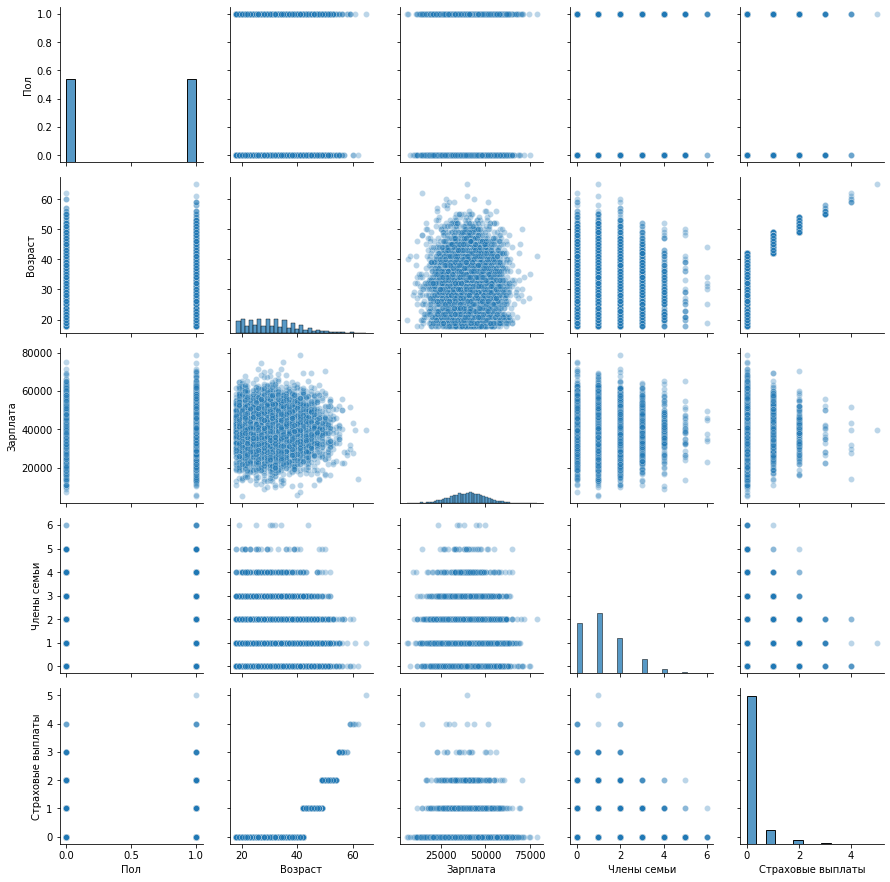

In [5]:
g = sns.PairGrid(data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, alpha=0.3)
plt.show()

Исходя из графиков можно предположить невысокое качество моделей линейной регрессии (линейная зависимость наблюдается только для пары "Возраст" - "Страховые выплаты"). 

## Возможность преобразования признаков

Для маскирования (обфускации) данных клиентов предлагается умножение матрицы признаков на некоторую обратимую матрицу.  Требуется показать что такое преобразование признаков не приведет к ухудшению качества линейной модели.  

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** качество предсказаний не изменится при использовании указанного преобразования.

**Обоснование:** 
Обосновать такой результат можно несколькими способами.
1. Простой, но не вполне строгий:
    - новые признаки после преобразования будут линейной комбинацией старых признаков;
    - новая модель будет линейной комбинацией новых признаков, следовательно она будет и линейной комбинацией старых признаков. Поскольку характер модели никак не меняется после преобразования её качество может остаться прежним.
2. Строгое обоснование: 

    -  новые признаки после преобразования:
$$ 
X^{new} = X \cdot P 
$$

    - решение задачи обучения (коэффициенты) для модели на новых признаках:

$$ 
w^{new} = ((X \cdot P)^T X \cdot P)^{-1} (X \cdot P)^T y
$$

можем раскрыть часть скобок, учитывая что $(A\cdot B)^{T} = B^{T} \cdot A^{T}$,   
а для произведения обратимых матриц $(A\cdot B)^{-1} = B^{-1} \cdot A^{-1}$:

$$
w^{new} = P^{-1}  \cdot  (X^T X)^{-1} (P^T)^{-1}\cdot  P^T \cdot X^T y = P^{-1}  \cdot  (X^T X)^{-1} \cdot X^T y
$$

т.е. новые коэффициенты можно выразить через старые:
$$
w^{new} = P^{-1}  \cdot  w
$$

Расчитаем предсказание для новой модели:
$$
a^{new} = X^{new} \cdot w^{new}= X^{new} \cdot P^{-1}  \cdot  w = X \cdot P \cdot P^{-1}  \cdot  w = X \cdot  w = a
$$

Таким образом, предсказания новой модели совпадают с предсказаниями исходной, что и требовалось доказать.

## Алгоритм преобразования

**Алгоритм**
1. Выбор матрицы преобразования (например из специальной ортогональной группы). Размерность матрицы равна числу различных признаков;
2. Преобразование признаков в тренировочных данных;
3. Обучение модели;
4. Преобразование признаков в тестовых данных;
4. Использование модели.


При необходимости признаки могут быть подготовлены (нормализованы/стандартизированы, сформированы полиномиальные признаки) перед маскирующим преобразованием.

**Обоснование**

Возможность использования умножения на обратимую матрицу для маскирования пользовательских данных была показана выше.   
При этом возможны следующие трудности:
1. матрица преобразования должна умножаться на матрицу признаков;
2. матрица преобразования должна быть обратимой;
3. желательно, чтобы матрица преобразования не сильно искажала масштаб данных;
4. необходима возможность выбора различных матриц преобразования;
5. матрица преобразования должна быть известна только в отделе/отделах занятых преобразованием пользовательских данных.

Проблема 1 решается использованием квадратной матрицы размером n x n, где n - число различных признаков (в данном случае 4).  
Проблемы 2 и 3 могут быть решены использвоание матриц из специальной ортогональной группы, что гарантирует обратимость и сохранение масштаба данных). Случайная матрица из группы SO(4) может быть получена, например, при помощи метода `special_ortho_group.rvs()` модуля `scipy.stats`, что решит проблему 4.  
Для решения проблемы 5 необходимо использования криптографических алгоритмов.  

Шаги 2 - 5 алгоритма тривиальны и не требуют специфического обоснования.  


Следует отметить, что при использование предложенного алгоритма **точность предсказаний не меняется только для линейных моделей**.

## Проверка алгоритма

Выделим независимые и целевой признаки:

In [6]:
features = data[data.columns[:-1]]
target = data[data.columns[-1]]

Разделение выборки на обучающую и тестовую:

In [7]:
(features_train,  features_valid, 
 target_train, target_valid) = train_test_split(features, target, random_state=123)

Для формирования матрицы преобразования выберем матрицу из группы SO(4). В качестве простого криптографического алгоритма воспользуемся алгоритмом Диффи-Хеллмана:

In [8]:
# Выбор случайной матрицы:
P_open = special_ortho_group.rvs(features.shape[1], random_state=123)

# Преобразование матрицы стороной A:
a = 107533 #Число известное только стороне А
P_a = np.linalg.matrix_power(P_open, a)

# Преобразование матрицы стороной B:
b = 76232
P_ab = np.linalg.matrix_power(P_a, b)

P_ab

array([[-0.31554353, -0.18357044, -0.85192628,  0.37543897],
       [ 0.7615045 , -0.23440432, -0.42210976, -0.43242074],
       [ 0.56441115,  0.28548453,  0.06940341,  0.7714411 ],
       [-0.04451824,  0.91096319, -0.3020392 , -0.27737204]])

Проверим что полученная матрица по прежнему является обратимой:

In [9]:
P_ab_inv = np.linalg.inv(P_ab)
np.round(P_ab_inv.dot(P_ab))

array([[ 1., -0., -0., -0.],
       [-0.,  1.,  0.,  0.],
       [ 0.,  0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

Выбранная матрица действительно обратима.

Обучение модели линейной регресии на исходных данных:

In [10]:
#Инициализация модели:
model = LinearRegression()
#Обучение модели:
model.fit(features_train, target_train)
#Проверка модели:
print(f"R2 для модели, построенной на исходных признаках: {model.score(features_valid, target_valid):0.4f}")

R2 для модели, построенной на исходных признаках: 0.4302


Преобразуем признаки с использованием выбранной матрицы:

In [11]:
features_train_new = features_train.dot(P_ab)
features_valid_new = features_valid.dot(P_ab)

Сравним исходные и преобразованные данные:

In [12]:
display(features_train.head())
pd.DataFrame(data=features_train_new).head()

,Пол,Возраст,Зарплата,Члены семьи
2413,1,30.0,42600.0,2
1471,1,30.0,24900.0,1
1196,0,24.0,45600.0,0
1509,0,49.0,35300.0,1
4110,1,30.0,37400.0,0


,0,1,2,3
2413,24066.355468,12156.247093,2942.466108,32850.238760
1471,14076.322663,7102.259995,1714.327732,19196.008734
1196,25755.424466,13012.468745,3154.665011,35167.335877
1509,19960.982733,10067.028968,2428.955071,27210.404699
4110,21131.506534,10669.905624,2582.172437,28839.299805


По преобразованным данным сложно угадать пол, возраст и число членов семьи, однако довольно легко установить порядок клиентов по зарплате. Это связано с тем, что зарплата на несколько порядков больше остальных показателей.  
Построим и проверим модель с использованием преобразованных признаков:

In [13]:
#Инициализация модели:
model_new = LinearRegression()
#Обучение модели:
model_new.fit(features_train_new, target_train)
#Проверка модели:
print(f"R2 для модели, построенной на исходных признаках: {model_new.score(features_valid_new, target_valid):0.4f}")

R2 для модели, построенной на исходных признаках: 0.4302


Как заранее и предполагалось выбранный алгоритм позволяет получать одинаковую точность (по $R^2$) предсказаний как на исходных, так и на маскированных пользовательских данных.  

Также, как было указано выше, предложенный алгоритм гарантирует сохранение точности предсказаний только для линейной регрессии. Например при использовании случайного леса получим:

In [14]:
# Обучение на исходных данных:
model_rf1 = RandomForestRegressor(random_state=123)
model_rf1.fit(features_train, target_train)
score_base = model_rf1.score(features_valid, target_valid)
print(f"Точность случайного леса на исходных данных: {score_base:0.3f}")

# Обучение на преобразованных данных:
model_rf2 = RandomForestRegressor(random_state=123)
model_rf2.fit(features_train_new, target_train)
score_transformed = model_rf2.score(features_valid_new, target_valid)
print(f"Точность случайного леса на преобразованных данных: {score_transformed:0.3f}")

Точность случайного леса на исходных данных: 0.997
Точность случайного леса на преобразованных данных: 0.436


Низкое качество при построении модели на преобразованных данных связано с разномасштабностью признаков - ко всем признакам примешивается значение зарплаты, на несколько порядков превышающее остальные. Улучить качество моделей отличных от линейной регрессии и одновременно повысить качество защиты персональных данных можно за счет масштабирования перед применением рассматриваемого преобразования:

In [15]:
# Масштабирование данных:
scl =  MinMaxScaler()
features_train = scl.fit_transform(features_train)
features_valid = scl.transform(features_valid)

# Преобразование масштабированных данных:
features_train_new = features_train.dot(P_ab)
features_valid_new = features_valid.dot(P_ab)

# Проверка данных:
pd.DataFrame(data=features_train_new).head()

,0,1,2,3
0,0.149696,0.204721,-1.025253,0.563007
1,0.021565,-0.015669,-0.991582,0.423964
2,0.405840,0.126182,-0.015936,0.366630
3,0.724596,0.113428,-0.300502,-0.017423
4,0.124712,-0.119076,-0.929470,0.601034


Масштабирование позволило успешно скрыть зарплату клиентов. Проверим влияние машстабирования на качество моделей:

In [16]:
model_new.fit(features_train_new, target_train)
score_lr_base = model_new.score(features_valid_new, target_valid)
print(f"Точность линейной модели на исходных масштабированных данных: {score_lr_base:0.3f}")

model_rf1.fit(features_train, target_train)
score_rf_base = model_rf1.score(features_valid, target_valid)
print(f"Точность случайного леса на исходных масштабированных данных: {score_rf_base:0.3f}")

model_rf2.fit(features_train_new, target_train)
score_rf_transformed = model_rf2.score(features_valid_new, target_valid)
print(f"Точность случайного леса на преобразованных масштабированных данных: {score_rf_transformed:0.3f}")

Точность линейной модели на исходных масштабированных данных: 0.430
Точность случайного леса на исходных масштабированных данных: 0.997
Точность случайного леса на преобразованных масштабированных данных: 0.922


Масштабирование ожидаемо не влияет на точность предсказаний линейной модели а также точность предсказаний модели случайного леса, обученного на не преобразованных данных. Качество предсказаний модели случайного леса, обученной на преобразованных данных после предварительного масштабирования сильно повышается.

## Выводы


1. Для защиты пользовательских данных может быть использовано умножение признаков на обратимую матрицу. Такое преобразование не влияет на точность предсказаний даваемых простой линейной моделью.
2. Для улучшения защиты пользовательских данных и повышения точности моделей отличных от линейной регрессии рекомендуется предварительное масштабирование признаков. При отсутствии значительных выбросов наилучшим с точки зрения защиты пользовательских данных будет нормализация признаков.  